# RAOB Profile 2022-10-23 1200 UTC

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from six import StringIO
from six import BytesIO
import pandas as pd

'''
Camborne RAOB Profile at 2022-10-23 1200 UTC
'''

nucaps_prof = "raob_03808_1023_1200.txt"
prof_data = np.loadtxt(nucaps_prof, usecols=range(0, 10), dtype='int', unpack=True)
print(prof_data)
pressure_mb = prof_data[0,:]
print(pressure_mb)
height_m = prof_data[1,:]
print(height_m)
temperature_c = prof_data[2,:]
print(temperature_c)
dewpoint_c = prof_data[3,:]
print(dewpoint_c)
RH = prof_data[4,:]
print(RH)
mixrat = (prof_data[5,:])/1000
print(mixrat)
wdir = prof_data[6,:]
print(wdir)
wspd = prof_data[7,:]
print(wspd)
thetae = prof_data[9,:]
print(thetae)
height_km = height_m/1000
print(height_km)

L_vapor = 2500
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
thetaw = thetae - (L_vapor*mixrat)
temperature_k = temperature_c + 273.15
tempvirt = temperature_k*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(pressure_mb == 671.0)
idx_plo = np.where(pressure_mb == 850.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_sfc = temperature_k[idx_plo]
T_top = temperature_k[idx_pup]
Te_sfc = thetae[idx_plo]
Te_top = thetae[idx_pup]
Tv_sfc = tempvirt_c[idx_plo]
Tv_top = tempvirt_c[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 1898
delta_zkm = 1.898
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_Te = (Te_sfc - Te_top)/(Z_lower - Z_upper)
gamma_Tv = (Tv_sfc - Tv_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)

print("")
print("Gamma = ", gamma)
if gamma > 4.8 and gamma <= 9.8:
    print("Conditional Instability") 
elif gamma > 9.8:
    print("Absolute Instability")
print("Theta-e Gamma = ", gamma_Te)
if gamma_Te < 0:
    print("Theta-e lapse rate is negative: potential instability")    
print("Tv Gamma = ", gamma_Tv)
print("Wetbulb Gamma = ", gamma_wb)
if gamma_wb > 4.8:
    print("Potential Instability")    

P_level_upper = pressure_mb[idx_pup]
P_level_lower = pressure_mb[idx_plo]
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_upper = temperature_c[idx_pup]
T_lower = temperature_c[idx_plo]
Tv_upper = tempvirt_c[idx_pup]
Tv_lower = tempvirt_c[idx_plo]
TD_upper = dewpoint_c[idx_pup]
TD_lower = dewpoint_c[idx_plo]
CAPE = 69
 
def MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE):
        gamma = (T_lower - T_upper)/(Z_upper - Z_lower)
        DD_upper = T_upper - TD_upper
        DD_lower = T_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP = (0.35435365777 * (MWPI**2)) + (1.2959855*MWPI) + 33.8176788
        return MWPI, WGP    
MWPI, WGP  = MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI = ", MWPI)
print("MWPI WGP (kt) = ", WGP)

def MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE):
        gamma = (Tv_lower - Tv_upper)/(Z_upper - Z_lower)
        DD_upper = Tv_upper - TD_upper
        DD_lower = Tv_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI_Tv = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP_Tv = (0.35435365777 * (MWPI_Tv**2)) + (1.2959855*MWPI_Tv) + 33.8176788
        return MWPI_Tv, WGP_Tv
MWPI_Tv, WGP_Tv  = MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI from Virtual Temperature:")
print("MWPI = ", MWPI_Tv)
print("MWPI WGP (kt) = ", WGP_Tv)

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_mb,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_mb, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("Sounding profile with virtual temperature")
print("")
data_sharppy=dict(zip(('pres','hght','tempvirt','dwpt'),(pressure_mb, height_m, tempvirt_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'tempvirt', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "tempvirt": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")

[[  987   986   984 ...   114   101   100]
 [   88    97   114 ... 15269 16037 16100]
 [   15    15    14 ...   -57   -58   -58]
 ...
 [   10     5     6 ...    25    30    30]
 [  290   289   289 ...   401   412   414]
 [  317   316   314 ...   401   412   414]]
[987 986 984 973 964 960 953 943 938 935 930 925 922 920 906 899 888 871
 870 852 850 848 845 815 805 802 792 787 784 772 768 765 763 758 752 733
 726 720 711 704 700 699 697 694 693 690 688 684 671 667 664 656 648 636
 628 626 618 613 612 610 601 593 586 577 555 553 544 540 532 521 517 514
 510 507 500 497 488 485 470 463 458 452 449 444 443 436 431 429 428 421
 413 412 407 400 396 380 378 371 361 353 348 343 338 329 327 326 319 313
 310 307 305 300 299 284 283 281 278 276 269 266 262 261 256 252 250 237
 231 229 225 219 211 206 204 200 197 194 190 187 184 179 169 164 150 149
 147 144 139 137 135 131 127 114 101 100]
[   88    97   114   208   286   321   382   470   514   541   585   630
   657   675   802   867   968  1128 

C:\Users\Ken.Pryor\AppData\Local\Temp\5\ipykernel_25032\1598859141.py:13: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  prof_data = np.loadtxt(nucaps_prof, usecols=range(0, 10), dtype='int', unpack=True)


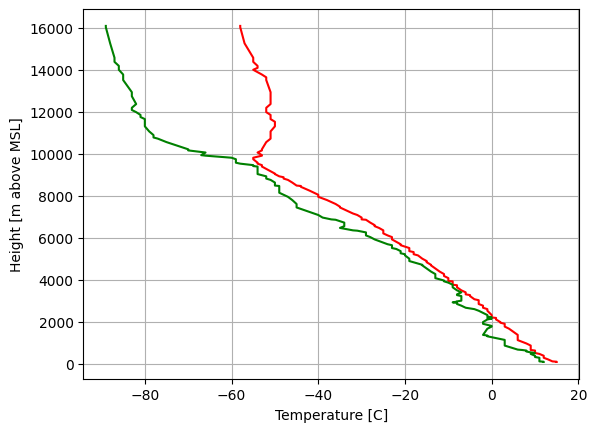

SURFACE HEIGHT (m MSL): 88.0
SURFACE HEIGHT (m AGL): 0.0
SURFACE HEIGHT (m MSL): 88.0


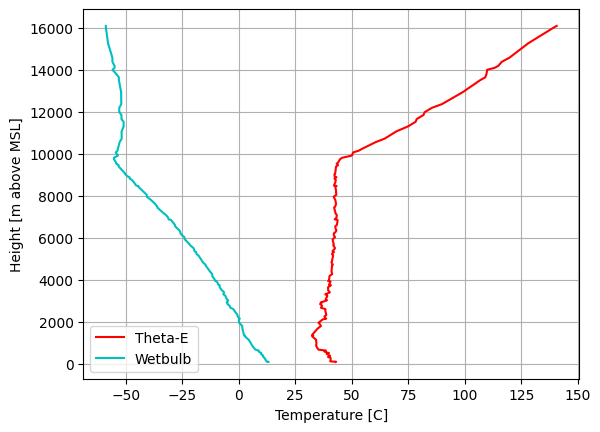

/data/home004/ken.pryor/.conda/envs/devel/lib/python3.9/site-packages/numpy/lib/function_base.py:1594: UserWarning: Warning: converting a masked element to nan.
  return interp_func(x, xp, fp, left, right)


Most-Unstable CAPE: 188.13
Surface-based CAPE: 175.46
Most-Unstable LCL: 386.6
Most-Unstable LFC: 8844.0
Most-Unstable EL: 8974.0
Most-Unstable LI: 0.33
670-850 mb Lapse Rate: 5.85
850-950 mb Lapse Rate: 6.92
Maximum Lapse Rate: 6.92
MWPI: 1.56
T Totals: 43.0
K-index: 19.0
TEI: 10.64
MWPI WGP (kt): 36.7
SB CAPE =  175.4631413868192
MU CAPE =  188.12939736689046
CAPE Ratio =  0.07
Surface-based convection


In [1]:
import sharppy
import sharppy.sharptab.profile as profile
import sharppy.sharptab.interp as interp
import sharppy.sharptab.winds as winds
import sharppy.sharptab.utils as utils
import sharppy.sharptab.params as params
import sharppy.sharptab.thermo as thermo

spc_file = open('RAOB_03808_1023_1200_ret.txt', 'r').read()

import numpy as np
from io import StringIO

def parseSPC(spc_file):
    """
        This function will read a SPC-style formatted observed sounding file,
        similar to that of the 14061619.OAX file included in the SHARPpy distribution.

        It will return the pressure, height, temperature, dewpoint, wind direction and wind speed data
        from that file.
    """
    ## read in the file
    data = np.array([l.strip() for l in spc_file.split('\n')])

    ## necessary index points
    title_idx = np.where( data == '%TITLE%')[0][0]
    start_idx = np.where( data == '%RAW%' )[0] + 1
    finish_idx = np.where( data == '%END%')[0]

    ## create the plot title
    data_header = data[title_idx + 1].split()
    location = data_header[0]
    time = data_header[1][:11]

    ## put it all together for StringIO
    full_data = '\n'.join(data[start_idx[0] : finish_idx[0]][:])
    sound_data = StringIO( full_data )

    ## read the data into arrays
    p, h, T, Td, wdir, wspd = np.genfromtxt( sound_data, delimiter=',', comments="%", unpack=True )

    return p, h, T, Td, wdir, wspd

pres, hght, tmpc, dwpc, wdir, wspd = parseSPC(spc_file)

prof = profile.create_profile(profile='default', pres=pres, hght=hght, tmpc=tmpc, \
                                    dwpc=dwpc, wspd=wspd, wdir=wdir, missing=-9999, strictQC=True)

import matplotlib.pyplot as plt
plt.plot(prof.tmpc, prof.hght, 'r-')
plt.plot(prof.dwpc, prof.hght, 'g-')
#plt.barbs(40*np.ones(len(prof.hght)), prof.hght, prof.u, prof.v)
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.grid()
plt.show()

msl_hght = prof.hght[prof.sfc] # Grab the surface height value
print("SURFACE HEIGHT (m MSL):",msl_hght)
agl_hght = interp.to_agl(prof, msl_hght) # Converts to AGL
print("SURFACE HEIGHT (m AGL):", agl_hght)
msl_hght = interp.to_msl(prof, agl_hght) # Converts to MSL
print("SURFACE HEIGHT (m MSL):",msl_hght)

plt.plot(thermo.ktoc(prof.thetae), prof.hght, 'r-', label='Theta-E')
plt.plot(prof.wetbulb, prof.hght, 'c-', label='Wetbulb')
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.legend()
plt.grid()
plt.show()

def lapse_rate(prof, lower, upper, pres=True):
    '''
        Calculates the lapse rate (C/km) from a profile object

        Parameters
        ----------
        prof : profile object
            Profile Object
        lower : number
            Lower Bound of lapse rate (mb or m AGL)
        upper : number
            Upper Bound of lapse rate (mb or m AGL)
        pres : bool (optional; default = True)
            Flag to determine if lower/upper are pressure [True]
            or height [False]

        Returns
        -------
        lapse rate (C/km) : number
        '''
    if pres:
        if (prof.pres[-1] > upper): return ma.masked
        p1 = lower
        p2 = upper
        z1 = interp.hght(prof, lower)
        z2 = interp.hght(prof, upper)
    else:
        z1 = interp.to_msl(prof, lower)
        z2 = interp.to_msl(prof, upper)
        p1 = interp.pres(prof, z1)
        p2 = interp.pres(prof, z2)
    tv1 = interp.vtmp(prof, p1)
    tv2 = interp.vtmp(prof, p2)
    return (tv2 - tv1) / (z2 - z1) * -1000.

def max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000):
    '''
        Calculates the maximum lapse rate (C/km) between a layer at a specified interval

        Parameters
        ----------
        prof: profile object
            Profile object
        lower : number
            Lower bound in height (m)
        upper : number
            Upper bound in height (m)
        interval : number
            Interval to assess the lapse rate at (m)
        depth : number
            Depth of the layer to assess the lapse rate over (m)

        Returns
        -------
        max lapse rate (C/km) : float
        lower pressure of max lapse rate (mb) : number
        upper pressure of max lapse rate (mb) : number
    '''

    bottom_levels = interp.to_msl(prof, np.arange(lower, upper-depth+interval, interval))
    top_levels = interp.to_msl(prof, np.arange(lower+depth, upper+interval, interval))
    bottom_pres = interp.pres(prof, bottom_levels)
    top_pres = interp.pres(prof, top_levels)
    all_lapse_rates = (interp.vtmp(prof, top_pres) - interp.vtmp(prof, bottom_pres)) * -1000.
    max_lapse_rate_idx = np.ma.argmax(all_lapse_rates)
    return all_lapse_rates[max_lapse_rate_idx]/depth, bottom_pres[max_lapse_rate_idx], top_pres[max_lapse_rate_idx]

def mwpi(prof):
    '''
        Microburst Windspeed Potential Index (MWPI)

        Formulated by Kenneth Pryor NOAA/NESDIS/STAR
        
        The Microburst Windspeed Potential Index (MWPI) is designed to quantify the most relevant factors
        in convective downburst generation in intermediate thermodynamic environments by incorporating 1) surface-based
        CAPE, 2) the temperature lapse rate between the 670- and 850-mb levels, and 3) DDD between the 670- and
        850-mb levels. The MWPI formula consists of a set of predictor variables (i.e., dewpoint depression
        and temperature lapse rate) that generates output of the expected microburst risk. 
        Scaling factors of 1000 J/kg, 5 C/km, and 5 C, respectively, are applied to the MWPI algorithm
        to yield a unitless MWPI value that expresses wind gust potential on a scale from 1 to 5:

        MWPI = (CAPE/1000) + LR/5 + DDD/5 
        
        Reference:
        Pryor, K. L., 2015: Progress and Developments of Downburst Prediction Applications of GOES. Wea. Forecasting, 30, 1182–1200.
        
        Parameters
        ----------
        prof : Profile object

        Returns
        -------
        mwpi : number
            MWPI (unitless)
    '''
    sbpcl = getattr(prof, 'sfcpcl', params.parcelx(prof, flag=1))
    sb_cape = sbpcl.bplus
    
    mupcl = getattr(prof, 'mupcl', params.parcelx(prof, flag=1))
    mu_cape = mupcl.bplus
    lr_hi = lapse_rate(prof, 850, 670, pres=True)
    lr_lo = lapse_rate(prof, 950, 850, pres=True)
    sfc = prof.pres[prof.sfc]
    
    if lr_hi > lr_lo:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)
    elif sfc < 950:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)    
    else:
    #MWPI calculation for surface-based mixed layer
        lr950_850 = lapse_rate(prof, 950, 850, pres=True)
        t850 = interp.temp(prof, 850.)
        t950 = interp.temp(prof, 950.)
        td850 = interp.dwpt(prof, 850.)
        td950 = interp.dwpt(prof, 950.)
        dd850 = t850 - td850
        dd950 = t950 - td950
        ddd = dd950 - dd850
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr950_850/5) + (ddd/5)
    
    return mwpi

sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel
mu_cape = mupcl.bplus
mucape = str(round(mupcl.bplus,2))
print("Most-Unstable CAPE:", mucape) # J/kg
sb_cape = sfcpcl.bplus
sbcape = str(round(sfcpcl.bplus,2))
print("Surface-based CAPE:", sbcape) # J/kg
lcl = round(mupcl.lclhght,2)
lfc = mupcl.lfchght
el = round(mupcl.elhght,2)
li = str(round(mupcl.li5,2))
print("Most-Unstable LCL:", lcl) # meters AGL
print("Most-Unstable LFC:", lfc) # meters AGL
print("Most-Unstable EL:", el) # meters AGL
print("Most-Unstable LI:", li) # C
lr_hi = str(round(lapse_rate(prof, 850, 670, pres=True),2))
print("670-850 mb Lapse Rate:", lr_hi)
lr_lo = str(round(lapse_rate(prof, 950, 850, pres=True),2))
print("850-950 mb Lapse Rate:", lr_lo)
lapse_rate_max, bottom_pres, top_pres = max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000)
lr_max = str(round(lapse_rate_max,2))
print("Maximum Lapse Rate:", lr_max)
mwp = round(mwpi(prof),2)
mwp_str = str(mwp)
print("MWPI:", mwp_str) 
t_tot = str(round(params.t_totals(prof),2))
print("T Totals:", t_tot)
k_idx = str(round(params.k_index(prof),2))
print("K-index:", k_idx)
te_idx = str(round(params.tei(prof),2))
print("TEI:", te_idx)
#WGP = (0.35435365777 * ((params.mwpi(prof))**2)) + (1.2959855*(params.mwpi(prof))) + 33.8176788
WGP = (0.35435365777 * (mwp**2)) + (1.2959855*mwp) + 33.8176788
mwpi_gp = str(round(WGP,2))
print("MWPI WGP (kt):", mwpi_gp)
#Calculate CAPE ratio
cape_ratio = 1 - ((sb_cape/mu_cape))
caperat = str(round(cape_ratio,2))
print("SB CAPE = ", sb_cape)
print("MU CAPE = ", mu_cape)
print("CAPE Ratio = ", caperat)
if cape_ratio > 0.3 and cape_ratio < 0.7:
    print("Hybrid Surface-based/elevated convection") 
elif cape_ratio >= 0.7:
    print("Elevated convection")
else:
    print("Surface-based convection")

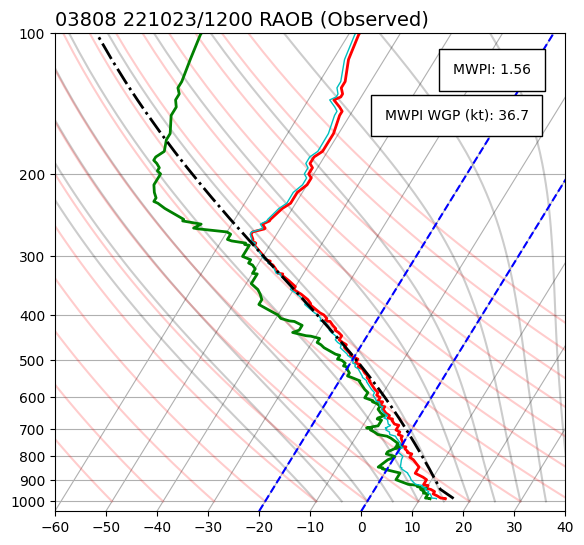

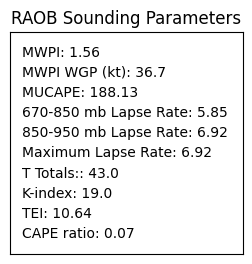

In [2]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('03808 221023/1200 RAOB (Observed)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.tmpc, prof.pres, 'r', lw=2)
ax.semilogy(prof.dwpc, prof.pres, 'g', lw=2)
ax.semilogy(prof.wetbulb, prof.pres, 'c-', lw=1)

# Plot the parcel trace.
ax.semilogy(pcl.ttrace, pcl.ptrace, 'k-.', lw=2)

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-60,40)
xticks = np.arange(-60, 41, 10)
ax.set_xticks(xticks)

ax.text(-20, 120, r'MWPI: '+mwp_str, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
ax.text(-15, 150, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
# Show the plot to the user.
plt.savefig('raob_03808_1023_1200.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
ax.set_title('RAOB Sounding Parameters')
#ax.set_xlabel('xlabel')
#ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 11])
ax.text(0.5, 10, r'MWPI: '+mwp_str, size=10, ha='left', va='center')
ax.text(0.5, 9, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='left', va='center')
ax.text(0.5, 8, r'MUCAPE: '+mucape, size=10, ha='left', va='center')
ax.text(0.5, 7, r'670-850 mb Lapse Rate: '+lr_hi, size=10, ha='left', va='center')
ax.text(0.5, 6, r'850-950 mb Lapse Rate: '+lr_lo, size=10, ha='left', va='center')
ax.text(0.5, 5, r'Maximum Lapse Rate: '+lr_max, size=10, ha='left', va='center')
ax.text(0.5, 4, r'T Totals:: '+t_tot, size=10, ha='left', va='center')
ax.text(0.5, 3, r'K-index: '+k_idx, size=10, ha='left', va='center')
ax.text(0.5, 2, r'TEI: '+te_idx, size=10, ha='left', va='center')
ax.text(0.5, 1, r'CAPE ratio: '+caperat, size=10, ha='left', va='center')
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('raob_03808_1023_1200_param.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

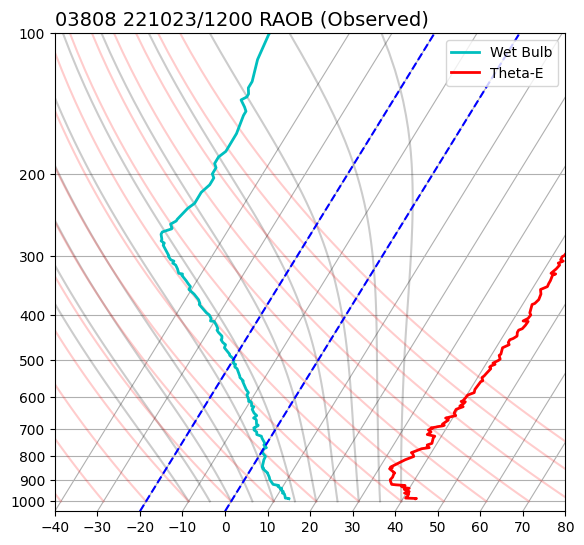

In [4]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('03808 221023/1200 RAOB (Observed)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.wetbulb, prof.pres, 'c', lw=2, label='Wet Bulb')
ax.semilogy(thermo.ktoc(prof.thetae), prof.pres, 'r', lw=2, label='Theta-E')

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-40,80)
xticks = np.arange(-40, 81, 10)
ax.set_xticks(xticks)

# Show the plot to the user.
plt.legend()
plt.savefig('raob_03808_1023_1200_wbte.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

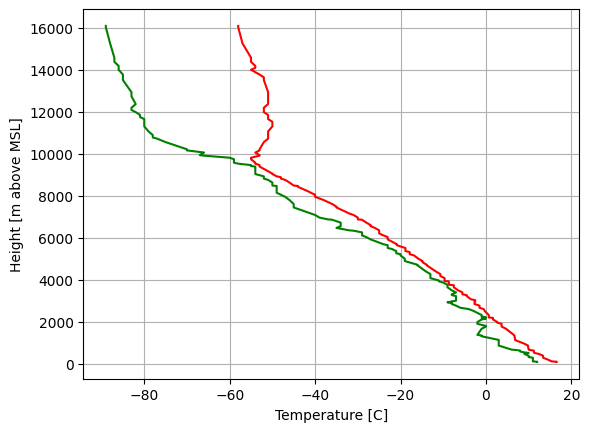

SURFACE HEIGHT (m MSL): 88.0
SURFACE HEIGHT (m AGL): 0.0
SURFACE HEIGHT (m MSL): 88.0


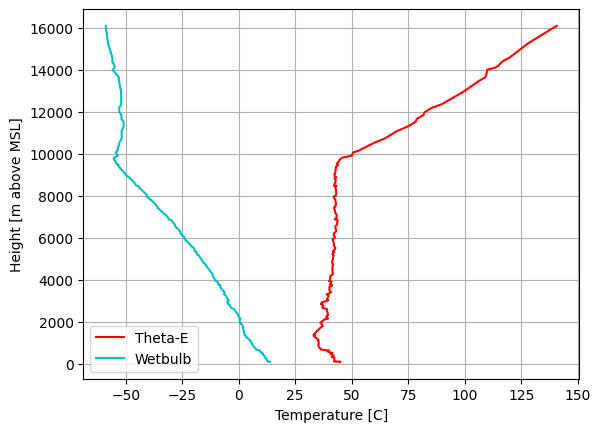

Most-Unstable CAPE: 373.98
Surface-based CAPE: 351.48
Most-Unstable LCL: 582.13
Most-Unstable LFC: 7090.656166668211
Most-Unstable EL: 9659.0
Most-Unstable LI: -0.63
670-850 mb Lapse Rate: 5.95
850-950 mb Lapse Rate: 7.7
Maximum Lapse Rate: 7.08
MWPI: 1.89
T Totals: 43.36
K-index: 19.19
TEI: 11.92
MWPI WGP (kt): 37.53
SB CAPE =  351.48315083070156
MU CAPE =  373.9775398526242
CAPE Ratio =  0.06
Surface-based convection


In [3]:
import sharppy
import sharppy.sharptab.profile as profile
import sharppy.sharptab.interp as interp
import sharppy.sharptab.winds as winds
import sharppy.sharptab.utils as utils
import sharppy.sharptab.params as params
import sharppy.sharptab.thermo as thermo

spc_file = open('RAOB_03808_1023_1200_ret_Tv.txt', 'r').read()

import numpy as np
from io import StringIO

def parseSPC(spc_file):
    """
        This function will read a SPC-style formatted observed sounding file,
        similar to that of the 14061619.OAX file included in the SHARPpy distribution.

        It will return the pressure, height, temperature, dewpoint, wind direction and wind speed data
        from that file.
    """
    ## read in the file
    data = np.array([l.strip() for l in spc_file.split('\n')])

    ## necessary index points
    title_idx = np.where( data == '%TITLE%')[0][0]
    start_idx = np.where( data == '%RAW%' )[0] + 1
    finish_idx = np.where( data == '%END%')[0]

    ## create the plot title
    data_header = data[title_idx + 1].split()
    location = data_header[0]
    time = data_header[1][:11]

    ## put it all together for StringIO
    full_data = '\n'.join(data[start_idx[0] : finish_idx[0]][:])
    sound_data = StringIO( full_data )

    ## read the data into arrays
    p, h, T, Td, wdir, wspd = np.genfromtxt( sound_data, delimiter=',', comments="%", unpack=True )

    return p, h, T, Td, wdir, wspd

pres, hght, tmpc, dwpc, wdir, wspd = parseSPC(spc_file)

prof = profile.create_profile(profile='default', pres=pres, hght=hght, tmpc=tmpc, \
                                    dwpc=dwpc, wspd=wspd, wdir=wdir, missing=-9999, strictQC=True)

import matplotlib.pyplot as plt
plt.plot(prof.tmpc, prof.hght, 'r-')
plt.plot(prof.dwpc, prof.hght, 'g-')
#plt.barbs(40*np.ones(len(prof.hght)), prof.hght, prof.u, prof.v)
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.grid()
plt.show()

msl_hght = prof.hght[prof.sfc] # Grab the surface height value
print("SURFACE HEIGHT (m MSL):",msl_hght)
agl_hght = interp.to_agl(prof, msl_hght) # Converts to AGL
print("SURFACE HEIGHT (m AGL):", agl_hght)
msl_hght = interp.to_msl(prof, agl_hght) # Converts to MSL
print("SURFACE HEIGHT (m MSL):",msl_hght)

plt.plot(thermo.ktoc(prof.thetae), prof.hght, 'r-', label='Theta-E')
plt.plot(prof.wetbulb, prof.hght, 'c-', label='Wetbulb')
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.legend()
plt.grid()
plt.show()

def lapse_rate(prof, lower, upper, pres=True):
    '''
        Calculates the lapse rate (C/km) from a profile object

        Parameters
        ----------
        prof : profile object
            Profile Object
        lower : number
            Lower Bound of lapse rate (mb or m AGL)
        upper : number
            Upper Bound of lapse rate (mb or m AGL)
        pres : bool (optional; default = True)
            Flag to determine if lower/upper are pressure [True]
            or height [False]

        Returns
        -------
        lapse rate (C/km) : number
        '''
    if pres:
        if (prof.pres[-1] > upper): return ma.masked
        p1 = lower
        p2 = upper
        z1 = interp.hght(prof, lower)
        z2 = interp.hght(prof, upper)
    else:
        z1 = interp.to_msl(prof, lower)
        z2 = interp.to_msl(prof, upper)
        p1 = interp.pres(prof, z1)
        p2 = interp.pres(prof, z2)
    tv1 = interp.vtmp(prof, p1)
    tv2 = interp.vtmp(prof, p2)
    return (tv2 - tv1) / (z2 - z1) * -1000.

def max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000):
    '''
        Calculates the maximum lapse rate (C/km) between a layer at a specified interval

        Parameters
        ----------
        prof: profile object
            Profile object
        lower : number
            Lower bound in height (m)
        upper : number
            Upper bound in height (m)
        interval : number
            Interval to assess the lapse rate at (m)
        depth : number
            Depth of the layer to assess the lapse rate over (m)

        Returns
        -------
        max lapse rate (C/km) : float
        lower pressure of max lapse rate (mb) : number
        upper pressure of max lapse rate (mb) : number
    '''

    bottom_levels = interp.to_msl(prof, np.arange(lower, upper-depth+interval, interval))
    top_levels = interp.to_msl(prof, np.arange(lower+depth, upper+interval, interval))
    bottom_pres = interp.pres(prof, bottom_levels)
    top_pres = interp.pres(prof, top_levels)
    all_lapse_rates = (interp.vtmp(prof, top_pres) - interp.vtmp(prof, bottom_pres)) * -1000.
    max_lapse_rate_idx = np.ma.argmax(all_lapse_rates)
    return all_lapse_rates[max_lapse_rate_idx]/depth, bottom_pres[max_lapse_rate_idx], top_pres[max_lapse_rate_idx]

def mwpi(prof):
    '''
        Microburst Windspeed Potential Index (MWPI)

        Formulated by Kenneth Pryor NOAA/NESDIS/STAR
        
        The Microburst Windspeed Potential Index (MWPI) is designed to quantify the most relevant factors
        in convective downburst generation in intermediate thermodynamic environments by incorporating 1) surface-based
        CAPE, 2) the temperature lapse rate between the 670- and 850-mb levels, and 3) DDD between the 670- and
        850-mb levels. The MWPI formula consists of a set of predictor variables (i.e., dewpoint depression
        and temperature lapse rate) that generates output of the expected microburst risk. 
        Scaling factors of 1000 J/kg, 5 C/km, and 5 C, respectively, are applied to the MWPI algorithm
        to yield a unitless MWPI value that expresses wind gust potential on a scale from 1 to 5:

        MWPI = (CAPE/1000) + LR/5 + DDD/5 
        
        Reference:
        Pryor, K. L., 2015: Progress and Developments of Downburst Prediction Applications of GOES. Wea. Forecasting, 30, 1182–1200.
        
        Parameters
        ----------
        prof : Profile object

        Returns
        -------
        mwpi : number
            MWPI (unitless)
    '''
    sbpcl = getattr(prof, 'sfcpcl', params.parcelx(prof, flag=1))
    sb_cape = sbpcl.bplus
    
    mupcl = getattr(prof, 'mupcl', params.parcelx(prof, flag=1))
    mu_cape = mupcl.bplus
    lr_hi = lapse_rate(prof, 850, 670, pres=True)
    lr_lo = lapse_rate(prof, 950, 850, pres=True)
    sfc = prof.pres[prof.sfc]
    
    if lr_hi > lr_lo:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)
    elif sfc < 950:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)    
    else:
    #MWPI calculation for surface-based mixed layer
        lr950_850 = lapse_rate(prof, 950, 850, pres=True)
        t850 = interp.temp(prof, 850.)
        t950 = interp.temp(prof, 950.)
        td850 = interp.dwpt(prof, 850.)
        td950 = interp.dwpt(prof, 950.)
        dd850 = t850 - td850
        dd950 = t950 - td950
        ddd = dd950 - dd850
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr950_850/5) + (ddd/5)
    
    return mwpi

sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel
mu_cape = mupcl.bplus
mucape = str(round(mupcl.bplus,2))
print("Most-Unstable CAPE:", mucape) # J/kg
sb_cape = sfcpcl.bplus
sbcape = str(round(sfcpcl.bplus,2))
print("Surface-based CAPE:", sbcape) # J/kg
lcl = round(mupcl.lclhght,2)
lfc = mupcl.lfchght
el = round(mupcl.elhght,2)
li = str(round(mupcl.li5,2))
print("Most-Unstable LCL:", lcl) # meters AGL
print("Most-Unstable LFC:", lfc) # meters AGL
print("Most-Unstable EL:", el) # meters AGL
print("Most-Unstable LI:", li) # C
lr_hi = str(round(lapse_rate(prof, 850, 670, pres=True),2))
print("670-850 mb Lapse Rate:", lr_hi)
lr_lo = str(round(lapse_rate(prof, 950, 850, pres=True),2))
print("850-950 mb Lapse Rate:", lr_lo)
lapse_rate_max, bottom_pres, top_pres = max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000)
lr_max = str(round(lapse_rate_max,2))
print("Maximum Lapse Rate:", lr_max)
mwp = round(mwpi(prof),2)
mwp_str = str(mwp)
print("MWPI:", mwp_str) 
t_tot = str(round(params.t_totals(prof),2))
print("T Totals:", t_tot)
k_idx = str(round(params.k_index(prof),2))
print("K-index:", k_idx)
te_idx = str(round(params.tei(prof),2))
print("TEI:", te_idx)
#WGP = (0.35435365777 * ((params.mwpi(prof))**2)) + (1.2959855*(params.mwpi(prof))) + 33.8176788
WGP = (0.35435365777 * (mwp**2)) + (1.2959855*mwp) + 33.8176788
mwpi_gp = str(round(WGP,2))
print("MWPI WGP (kt):", mwpi_gp)
#Calculate CAPE ratio
cape_ratio = 1 - ((sb_cape/mu_cape))
caperat = str(round(cape_ratio,2))
print("SB CAPE = ", sb_cape)
print("MU CAPE = ", mu_cape)
print("CAPE Ratio = ", caperat)
if cape_ratio > 0.3 and cape_ratio < 0.7:
    print("Hybrid Surface-based/elevated convection") 
elif cape_ratio >= 0.7:
    print("Elevated convection")
else:
    print("Surface-based convection")

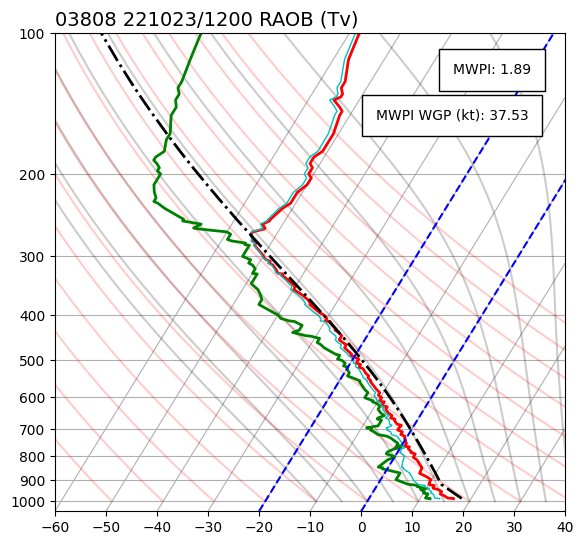

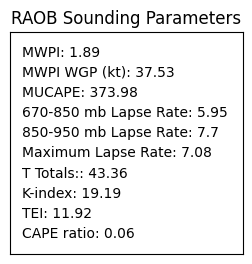

In [4]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('03808 221023/1200 RAOB (Tv)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.tmpc, prof.pres, 'r', lw=2)
ax.semilogy(prof.dwpc, prof.pres, 'g', lw=2)
ax.semilogy(prof.wetbulb, prof.pres, 'c-', lw=1)

# Plot the parcel trace.
ax.semilogy(pcl.ttrace, pcl.ptrace, 'k-.', lw=2)

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-60,40)
xticks = np.arange(-60, 41, 10)
ax.set_xticks(xticks)

ax.text(-20, 120, r'MWPI: '+mwp_str, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
ax.text(-15, 150, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
# Show the plot to the user.
plt.savefig('raob_03808_1023_1200_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
ax.set_title('RAOB Sounding Parameters')
#ax.set_xlabel('xlabel')
#ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 11])
ax.text(0.5, 10, r'MWPI: '+mwp_str, size=10, ha='left', va='center')
ax.text(0.5, 9, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='left', va='center')
ax.text(0.5, 8, r'MUCAPE: '+mucape, size=10, ha='left', va='center')
ax.text(0.5, 7, r'670-850 mb Lapse Rate: '+lr_hi, size=10, ha='left', va='center')
ax.text(0.5, 6, r'850-950 mb Lapse Rate: '+lr_lo, size=10, ha='left', va='center')
ax.text(0.5, 5, r'Maximum Lapse Rate: '+lr_max, size=10, ha='left', va='center')
ax.text(0.5, 4, r'T Totals:: '+t_tot, size=10, ha='left', va='center')
ax.text(0.5, 3, r'K-index: '+k_idx, size=10, ha='left', va='center')
ax.text(0.5, 2, r'TEI: '+te_idx, size=10, ha='left', va='center')
ax.text(0.5, 1, r'CAPE ratio: '+caperat, size=10, ha='left', va='center')
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('raob_03808_1023_1200_param_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

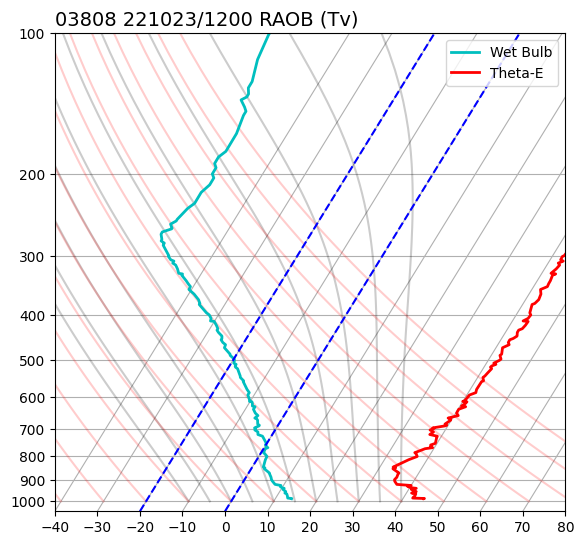

In [7]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('03808 221023/1200 RAOB (Tv)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.wetbulb, prof.pres, 'c', lw=2, label='Wet Bulb')
ax.semilogy(thermo.ktoc(prof.thetae), prof.pres, 'r', lw=2, label='Theta-E')

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-40,80)
xticks = np.arange(-40, 81, 10)
ax.set_xticks(xticks)

# Show the plot to the user.
plt.legend()
plt.savefig('raob_03808_1023_1200_wbte_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from six import StringIO
from six import BytesIO
import pandas as pd

'''
03354 Nottingham RAOB Profile at 1200 UTC 23 October 2022 
'''

nucaps_prof = "raob_03354_1023_1200.txt"
prof_data = np.loadtxt(nucaps_prof, usecols=range(0, 10), dtype='int', unpack=True)
print(prof_data)
pressure_mb = prof_data[0,:]
print(pressure_mb)
height_m = prof_data[1,:]
print(height_m)
temperature_c = prof_data[2,:]
print(temperature_c)
dewpoint_c = prof_data[3,:]
print(dewpoint_c)
RH = prof_data[4,:]
print(RH)
mixrat = (prof_data[5,:])/1000
print(mixrat)
wdir = prof_data[6,:]
print(wdir)
wspd = prof_data[7,:]
print(wspd)
thetae = prof_data[9,:]
print(thetae)
height_km = height_m/1000
print(height_km)

L_vapor = 2500
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
thetaw = thetae - (L_vapor*mixrat)
temperature_k = temperature_c + 273.15
tempvirt = temperature_k*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(pressure_mb == 700.0)
idx_plo = np.where(pressure_mb == 912.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_sfc = temperature_k[idx_plo]
T_top = temperature_k[idx_pup]
Te_sfc = thetae[idx_plo]
Te_top = thetae[idx_pup]
Tv_sfc = tempvirt_c[idx_plo]
Tv_top = tempvirt_c[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 2159
delta_zkm = 2.159
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_Te = (Te_sfc - Te_top)/(Z_lower - Z_upper)
gamma_Tv = (Tv_sfc - Tv_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)

print("")
print("Gamma = ", gamma)
if gamma > 4.8 and gamma <= 9.8:
    print("Conditional Instability") 
elif gamma > 9.8:
    print("Absolute Instability")
print("Theta-e Gamma = ", gamma_Te)
if gamma_Te < 0:
    print("Theta-e lapse rate is negative: potential instability")    
print("Tv Gamma = ", gamma_Tv)
print("Wetbulb Gamma = ", gamma_wb)
if gamma_wb > 4.8:
    print("Potential Instability")    

P_level_upper = pressure_mb[idx_pup]
P_level_lower = pressure_mb[idx_plo]
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_upper = temperature_c[idx_pup]
T_lower = temperature_c[idx_plo]
Tv_upper = tempvirt_c[idx_pup]
Tv_lower = tempvirt_c[idx_plo]
TD_upper = dewpoint_c[idx_pup]
TD_lower = dewpoint_c[idx_plo]
CAPE = 69
 
def MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE):
        gamma = (T_lower - T_upper)/(Z_upper - Z_lower)
        DD_upper = T_upper - TD_upper
        DD_lower = T_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP = (0.35435365777 * (MWPI**2)) + (1.2959855*MWPI) + 33.8176788
        return MWPI, WGP    
MWPI, WGP  = MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI = ", MWPI)
print("MWPI WGP (kt) = ", WGP)

def MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE):
        gamma = (Tv_lower - Tv_upper)/(Z_upper - Z_lower)
        DD_upper = Tv_upper - TD_upper
        DD_lower = Tv_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI_Tv = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP_Tv = (0.35435365777 * (MWPI_Tv**2)) + (1.2959855*MWPI_Tv) + 33.8176788
        return MWPI_Tv, WGP_Tv
MWPI_Tv, WGP_Tv  = MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI from Virtual Temperature:")
print("MWPI = ", MWPI_Tv)
print("MWPI WGP (kt) = ", WGP_Tv)

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_mb,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_mb, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("Sounding profile with virtual temperature")
print("")
data_sharppy=dict(zip(('pres','hght','tempvirt','dwpt'),(pressure_mb, height_m, tempvirt_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'tempvirt', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "tempvirt": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")

[[  987   984   968 ...   116   110   100]
 [  117   143   281 ... 15169 15502 16100]
 [   13    13    12 ...   -59   -58   -59]
 ...
 [   10     6    15 ...    32    29    25]
 [  288   288   288 ...   395   404   412]
 [  315   315   314 ...   395   404   412]]
[987 984 968 957 947 943 942 932 925 919 914 913 912 898 892 879 872 865
 850 817 800 787 783 768 763 757 756 754 746 728 724 708 701 700 697 694
 690 687 684 681 673 667 664 662 661 660 659 653 651 650 645 633 631 629
 627 624 623 622 620 617 614 612 611 606 603 602 599 594 586 580 577 560
 553 548 545 525 521 515 500 498 493 473 464 441 433 430 419 401 400 396
 388 373 370 368 362 360 354 348 343 340 335 334 311 309 306 300 275 274
 271 266 261 257 256 254 251 250 247 240 236 206 200 197 195 190 183 178
 176 172 163 160 156 150 147 146 143 135 132 125 117 116 110 100]
[  117   143   281   376   465   500   509   598   661   715   761   770
   779   908   964  1087  1153  1220  1365  1690  1863  1996  2037  2194
  2247  2310 

/tmp/ipykernel_421031/3323074723.py:13: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  prof_data = np.loadtxt(nucaps_prof, usecols=range(0, 10), dtype='int', unpack=True)


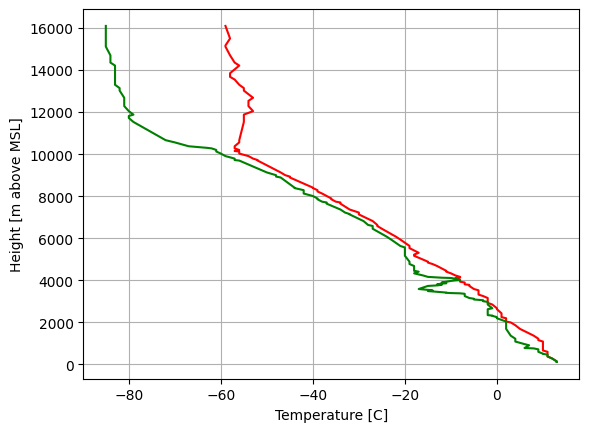

SURFACE HEIGHT (m MSL): 117.0
SURFACE HEIGHT (m AGL): 0.0
SURFACE HEIGHT (m MSL): 117.0


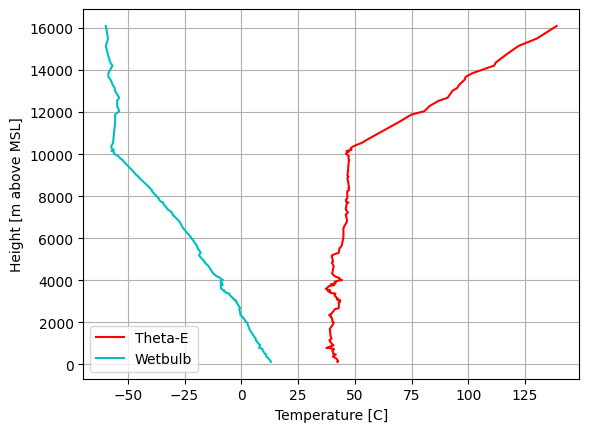

Most-Unstable CAPE: 22.43
Surface-based CAPE: 17.82
Most-Unstable LCL: 3060.25
Most-Unstable LFC: 4466.875065863298
Most-Unstable EL: 5192.0
Most-Unstable LI: 0.09
670-850 mb Lapse Rate: 6.2
850-950 mb Lapse Rate: 3.82
Maximum Lapse Rate: 7.94
MWPI: 1.56
T Totals: 49.0
K-index: 30.0
TEI: 7.18
MWPI WGP (kt): 36.7
SB CAPE =  17.81873510960574
MU CAPE =  22.42634346409195
CAPE Ratio =  0.21
Surface-based convection


In [5]:
import sharppy
import sharppy.sharptab.profile as profile
import sharppy.sharptab.interp as interp
import sharppy.sharptab.winds as winds
import sharppy.sharptab.utils as utils
import sharppy.sharptab.params as params
import sharppy.sharptab.thermo as thermo

spc_file = open('RAOB_03354_1023_1200_ret.txt', 'r').read()

import numpy as np
from io import StringIO

def parseSPC(spc_file):
    """
        This function will read a SPC-style formatted observed sounding file,
        similar to that of the 14061619.OAX file included in the SHARPpy distribution.

        It will return the pressure, height, temperature, dewpoint, wind direction and wind speed data
        from that file.
    """
    ## read in the file
    data = np.array([l.strip() for l in spc_file.split('\n')])

    ## necessary index points
    title_idx = np.where( data == '%TITLE%')[0][0]
    start_idx = np.where( data == '%RAW%' )[0] + 1
    finish_idx = np.where( data == '%END%')[0]

    ## create the plot title
    data_header = data[title_idx + 1].split()
    location = data_header[0]
    time = data_header[1][:11]

    ## put it all together for StringIO
    full_data = '\n'.join(data[start_idx[0] : finish_idx[0]][:])
    sound_data = StringIO( full_data )

    ## read the data into arrays
    p, h, T, Td, wdir, wspd = np.genfromtxt( sound_data, delimiter=',', comments="%", unpack=True )

    return p, h, T, Td, wdir, wspd

pres, hght, tmpc, dwpc, wdir, wspd = parseSPC(spc_file)

prof = profile.create_profile(profile='default', pres=pres, hght=hght, tmpc=tmpc, \
                                    dwpc=dwpc, wspd=wspd, wdir=wdir, missing=-9999, strictQC=True)

import matplotlib.pyplot as plt
plt.plot(prof.tmpc, prof.hght, 'r-')
plt.plot(prof.dwpc, prof.hght, 'g-')
#plt.barbs(40*np.ones(len(prof.hght)), prof.hght, prof.u, prof.v)
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.grid()
plt.show()

msl_hght = prof.hght[prof.sfc] # Grab the surface height value
print("SURFACE HEIGHT (m MSL):",msl_hght)
agl_hght = interp.to_agl(prof, msl_hght) # Converts to AGL
print("SURFACE HEIGHT (m AGL):", agl_hght)
msl_hght = interp.to_msl(prof, agl_hght) # Converts to MSL
print("SURFACE HEIGHT (m MSL):",msl_hght)

plt.plot(thermo.ktoc(prof.thetae), prof.hght, 'r-', label='Theta-E')
plt.plot(prof.wetbulb, prof.hght, 'c-', label='Wetbulb')
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.legend()
plt.grid()
plt.show()

def lapse_rate(prof, lower, upper, pres=True):
    '''
        Calculates the lapse rate (C/km) from a profile object

        Parameters
        ----------
        prof : profile object
            Profile Object
        lower : number
            Lower Bound of lapse rate (mb or m AGL)
        upper : number
            Upper Bound of lapse rate (mb or m AGL)
        pres : bool (optional; default = True)
            Flag to determine if lower/upper are pressure [True]
            or height [False]

        Returns
        -------
        lapse rate (C/km) : number
        '''
    if pres:
        if (prof.pres[-1] > upper): return ma.masked
        p1 = lower
        p2 = upper
        z1 = interp.hght(prof, lower)
        z2 = interp.hght(prof, upper)
    else:
        z1 = interp.to_msl(prof, lower)
        z2 = interp.to_msl(prof, upper)
        p1 = interp.pres(prof, z1)
        p2 = interp.pres(prof, z2)
    tv1 = interp.vtmp(prof, p1)
    tv2 = interp.vtmp(prof, p2)
    return (tv2 - tv1) / (z2 - z1) * -1000.

def max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000):
    '''
        Calculates the maximum lapse rate (C/km) between a layer at a specified interval

        Parameters
        ----------
        prof: profile object
            Profile object
        lower : number
            Lower bound in height (m)
        upper : number
            Upper bound in height (m)
        interval : number
            Interval to assess the lapse rate at (m)
        depth : number
            Depth of the layer to assess the lapse rate over (m)

        Returns
        -------
        max lapse rate (C/km) : float
        lower pressure of max lapse rate (mb) : number
        upper pressure of max lapse rate (mb) : number
    '''

    bottom_levels = interp.to_msl(prof, np.arange(lower, upper-depth+interval, interval))
    top_levels = interp.to_msl(prof, np.arange(lower+depth, upper+interval, interval))
    bottom_pres = interp.pres(prof, bottom_levels)
    top_pres = interp.pres(prof, top_levels)
    all_lapse_rates = (interp.vtmp(prof, top_pres) - interp.vtmp(prof, bottom_pres)) * -1000.
    max_lapse_rate_idx = np.ma.argmax(all_lapse_rates)
    return all_lapse_rates[max_lapse_rate_idx]/depth, bottom_pres[max_lapse_rate_idx], top_pres[max_lapse_rate_idx]

def mwpi(prof):
    '''
        Microburst Windspeed Potential Index (MWPI)

        Formulated by Kenneth Pryor NOAA/NESDIS/STAR
        
        The Microburst Windspeed Potential Index (MWPI) is designed to quantify the most relevant factors
        in convective downburst generation in intermediate thermodynamic environments by incorporating 1) surface-based
        CAPE, 2) the temperature lapse rate between the 670- and 850-mb levels, and 3) DDD between the 670- and
        850-mb levels. The MWPI formula consists of a set of predictor variables (i.e., dewpoint depression
        and temperature lapse rate) that generates output of the expected microburst risk. 
        Scaling factors of 1000 J/kg, 5 C/km, and 5 C, respectively, are applied to the MWPI algorithm
        to yield a unitless MWPI value that expresses wind gust potential on a scale from 1 to 5:

        MWPI = (CAPE/1000) + LR/5 + DDD/5 
        
        Reference:
        Pryor, K. L., 2015: Progress and Developments of Downburst Prediction Applications of GOES. Wea. Forecasting, 30, 1182–1200.
        
        Parameters
        ----------
        prof : Profile object

        Returns
        -------
        mwpi : number
            MWPI (unitless)
    '''
    sbpcl = getattr(prof, 'sfcpcl', params.parcelx(prof, flag=1))
    sb_cape = sbpcl.bplus
    
    mupcl = getattr(prof, 'mupcl', params.parcelx(prof, flag=1))
    mu_cape = mupcl.bplus
    lr_hi = lapse_rate(prof, 850, 670, pres=True)
    lr_lo = lapse_rate(prof, 950, 850, pres=True)
    sfc = prof.pres[prof.sfc]
    
    if lr_hi > lr_lo:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)
    elif sfc < 950:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)    
    else:
    #MWPI calculation for surface-based mixed layer
        lr950_850 = lapse_rate(prof, 950, 850, pres=True)
        t850 = interp.temp(prof, 850.)
        t950 = interp.temp(prof, 950.)
        td850 = interp.dwpt(prof, 850.)
        td950 = interp.dwpt(prof, 950.)
        dd850 = t850 - td850
        dd950 = t950 - td950
        ddd = dd950 - dd850
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr950_850/5) + (ddd/5)
    
    return mwpi

sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel
mu_cape = mupcl.bplus
mucape = str(round(mupcl.bplus,2))
print("Most-Unstable CAPE:", mucape) # J/kg
sb_cape = sfcpcl.bplus
sbcape = str(round(sfcpcl.bplus,2))
print("Surface-based CAPE:", sbcape) # J/kg
lcl = round(mupcl.lclhght,2)
lfc = mupcl.lfchght
el = round(mupcl.elhght,2)
li = str(round(mupcl.li5,2))
print("Most-Unstable LCL:", lcl) # meters AGL
print("Most-Unstable LFC:", lfc) # meters AGL
print("Most-Unstable EL:", el) # meters AGL
print("Most-Unstable LI:", li) # C
lr_hi = str(round(lapse_rate(prof, 850, 670, pres=True),2))
print("670-850 mb Lapse Rate:", lr_hi)
lr_lo = str(round(lapse_rate(prof, 950, 850, pres=True),2))
print("850-950 mb Lapse Rate:", lr_lo)
lapse_rate_max, bottom_pres, top_pres = max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000)
lr_max = str(round(lapse_rate_max,2))
print("Maximum Lapse Rate:", lr_max)
mwi = mwpi(prof)
mwp = round(mwi,2)
mwp_str = str(mwp)
print("MWPI:", mwp_str) 
t_tot = str(round(params.t_totals(prof),2))
print("T Totals:", t_tot)
k_idx = str(round(params.k_index(prof),2))
print("K-index:", k_idx)
te_idx = str(round(params.tei(prof),2))
print("TEI:", te_idx)
#WGP = (0.35435365777 * ((params.mwpi(prof))**2)) + (1.2959855*(params.mwpi(prof))) + 33.8176788
WGP = (0.35435365777 * (mwp**2)) + (1.2959855*mwp) + 33.8176788
mwpi_gp = str(round(WGP,2))
print("MWPI WGP (kt):", mwpi_gp)

#Calculate CAPE ratio
cape_ratio = 1 - ((sb_cape/mu_cape))
caperat = str(round(cape_ratio,2))
print("SB CAPE = ", sb_cape)
print("MU CAPE = ", mu_cape)
print("CAPE Ratio = ", caperat)
if cape_ratio > 0.3 and cape_ratio < 0.7:
    print("Hybrid Surface-based/elevated convection") 
elif cape_ratio >= 0.7:
    print("Elevated convection")
else:
    print("Surface-based convection")

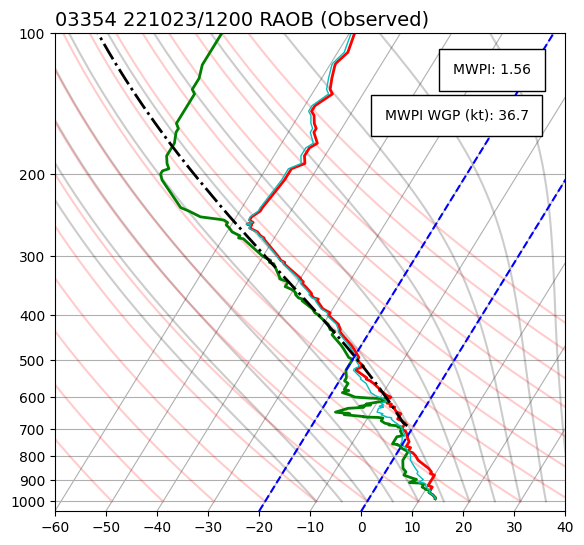

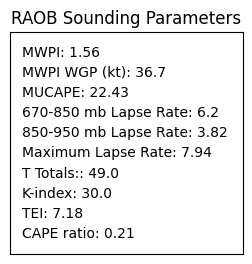

In [6]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('03354 221023/1200 RAOB (Observed)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.tmpc, prof.pres, 'r', lw=2)
ax.semilogy(prof.dwpc, prof.pres, 'g', lw=2)
ax.semilogy(prof.wetbulb, prof.pres, 'c-', lw=1)

# Plot the parcel trace.
ax.semilogy(pcl.ttrace, pcl.ptrace, 'k-.', lw=2)

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-60,40)
xticks = np.arange(-60, 41, 10)
ax.set_xticks(xticks)

ax.text(-20, 120, r'MWPI: '+mwp_str, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
ax.text(-15, 150, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
# Show the plot to the user.
plt.savefig('raob_03354_1023_1200.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
ax.set_title('RAOB Sounding Parameters')
#ax.set_xlabel('xlabel')
#ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 11])
ax.text(0.5, 10, r'MWPI: '+mwp_str, size=10, ha='left', va='center')
ax.text(0.5, 9, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='left', va='center')
ax.text(0.5, 8, r'MUCAPE: '+mucape, size=10, ha='left', va='center')
ax.text(0.5, 7, r'670-850 mb Lapse Rate: '+lr_hi, size=10, ha='left', va='center')
ax.text(0.5, 6, r'850-950 mb Lapse Rate: '+lr_lo, size=10, ha='left', va='center')
ax.text(0.5, 5, r'Maximum Lapse Rate: '+lr_max, size=10, ha='left', va='center')
ax.text(0.5, 4, r'T Totals:: '+t_tot, size=10, ha='left', va='center')
ax.text(0.5, 3, r'K-index: '+k_idx, size=10, ha='left', va='center')
ax.text(0.5, 2, r'TEI: '+te_idx, size=10, ha='left', va='center')
ax.text(0.5, 1, r'CAPE ratio: '+caperat, size=10, ha='left', va='center')
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('raob_03354_1023_1200_param.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

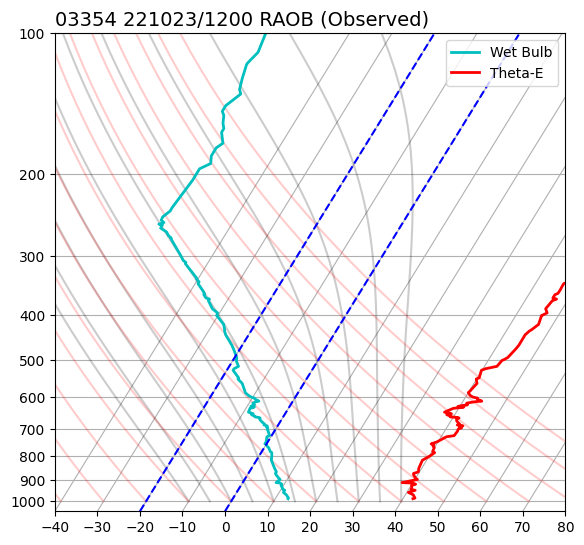

In [5]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('03354 221023/1200 RAOB (Observed)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.wetbulb, prof.pres, 'c', lw=2, label='Wet Bulb')
ax.semilogy(thermo.ktoc(prof.thetae), prof.pres, 'r', lw=2, label='Theta-E')

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-40,80)
xticks = np.arange(-40, 81, 10)
ax.set_xticks(xticks)

# Show the plot to the user.
plt.legend()
plt.savefig('raob_03354_1023_1200_wbte.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

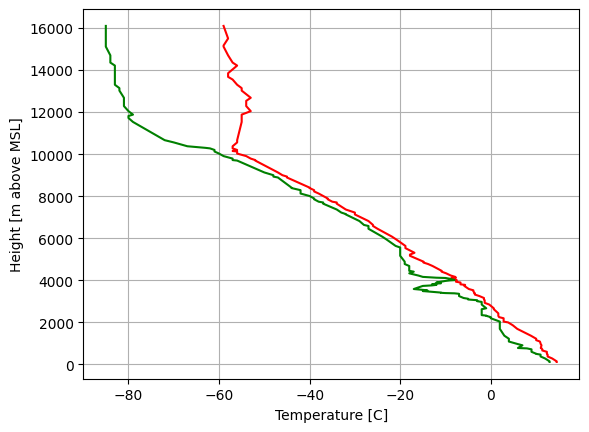

SURFACE HEIGHT (m MSL): 117.0
SURFACE HEIGHT (m AGL): 0.0
SURFACE HEIGHT (m MSL): 117.0


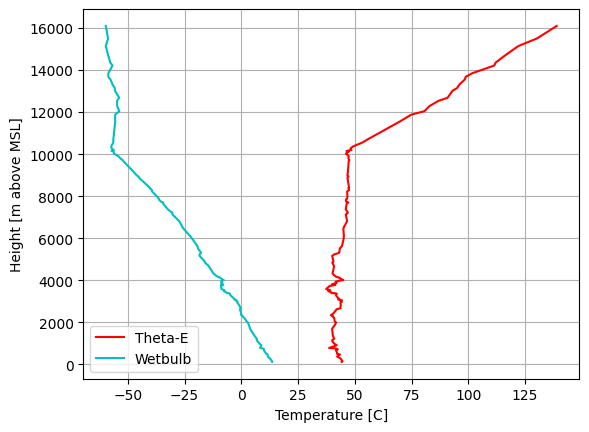

Most-Unstable CAPE: 50.69
Surface-based CAPE: 36.2
Most-Unstable LCL: 224.23
Most-Unstable LFC: 4214.0
Most-Unstable EL: 5517.0
Most-Unstable LI: -0.34
670-850 mb Lapse Rate: 6.39
850-950 mb Lapse Rate: 4.58
Maximum Lapse Rate: 8.11
MWPI: 1.69
T Totals: 49.54
K-index: 30.04
TEI: 7.58
MWPI WGP (kt): 37.02
SB CAPE =  36.20486340336461
MU CAPE =  50.690933622246845
CAPE Ratio =  0.29
Surface-based convection


In [8]:
import sharppy
import sharppy.sharptab.profile as profile
import sharppy.sharptab.interp as interp
import sharppy.sharptab.winds as winds
import sharppy.sharptab.utils as utils
import sharppy.sharptab.params as params
import sharppy.sharptab.thermo as thermo

spc_file = open('RAOB_03354_1023_1200_ret_Tv.txt', 'r').read()

import numpy as np
from io import StringIO

def parseSPC(spc_file):
    """
        This function will read a SPC-style formatted observed sounding file,
        similar to that of the 14061619.OAX file included in the SHARPpy distribution.

        It will return the pressure, height, temperature, dewpoint, wind direction and wind speed data
        from that file.
    """
    ## read in the file
    data = np.array([l.strip() for l in spc_file.split('\n')])

    ## necessary index points
    title_idx = np.where( data == '%TITLE%')[0][0]
    start_idx = np.where( data == '%RAW%' )[0] + 1
    finish_idx = np.where( data == '%END%')[0]

    ## create the plot title
    data_header = data[title_idx + 1].split()
    location = data_header[0]
    time = data_header[1][:11]

    ## put it all together for StringIO
    full_data = '\n'.join(data[start_idx[0] : finish_idx[0]][:])
    sound_data = StringIO( full_data )

    ## read the data into arrays
    p, h, T, Td, wdir, wspd = np.genfromtxt( sound_data, delimiter=',', comments="%", unpack=True )

    return p, h, T, Td, wdir, wspd

pres, hght, tmpc, dwpc, wdir, wspd = parseSPC(spc_file)

prof = profile.create_profile(profile='default', pres=pres, hght=hght, tmpc=tmpc, \
                                    dwpc=dwpc, wspd=wspd, wdir=wdir, missing=-9999, strictQC=True)

import matplotlib.pyplot as plt
plt.plot(prof.tmpc, prof.hght, 'r-')
plt.plot(prof.dwpc, prof.hght, 'g-')
#plt.barbs(40*np.ones(len(prof.hght)), prof.hght, prof.u, prof.v)
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.grid()
plt.show()

msl_hght = prof.hght[prof.sfc] # Grab the surface height value
print("SURFACE HEIGHT (m MSL):",msl_hght)
agl_hght = interp.to_agl(prof, msl_hght) # Converts to AGL
print("SURFACE HEIGHT (m AGL):", agl_hght)
msl_hght = interp.to_msl(prof, agl_hght) # Converts to MSL
print("SURFACE HEIGHT (m MSL):",msl_hght)

plt.plot(thermo.ktoc(prof.thetae), prof.hght, 'r-', label='Theta-E')
plt.plot(prof.wetbulb, prof.hght, 'c-', label='Wetbulb')
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.legend()
plt.grid()
plt.show()

def lapse_rate(prof, lower, upper, pres=True):
    '''
        Calculates the lapse rate (C/km) from a profile object

        Parameters
        ----------
        prof : profile object
            Profile Object
        lower : number
            Lower Bound of lapse rate (mb or m AGL)
        upper : number
            Upper Bound of lapse rate (mb or m AGL)
        pres : bool (optional; default = True)
            Flag to determine if lower/upper are pressure [True]
            or height [False]

        Returns
        -------
        lapse rate (C/km) : number
        '''
    if pres:
        if (prof.pres[-1] > upper): return ma.masked
        p1 = lower
        p2 = upper
        z1 = interp.hght(prof, lower)
        z2 = interp.hght(prof, upper)
    else:
        z1 = interp.to_msl(prof, lower)
        z2 = interp.to_msl(prof, upper)
        p1 = interp.pres(prof, z1)
        p2 = interp.pres(prof, z2)
    tv1 = interp.vtmp(prof, p1)
    tv2 = interp.vtmp(prof, p2)
    return (tv2 - tv1) / (z2 - z1) * -1000.

def max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000):
    '''
        Calculates the maximum lapse rate (C/km) between a layer at a specified interval

        Parameters
        ----------
        prof: profile object
            Profile object
        lower : number
            Lower bound in height (m)
        upper : number
            Upper bound in height (m)
        interval : number
            Interval to assess the lapse rate at (m)
        depth : number
            Depth of the layer to assess the lapse rate over (m)

        Returns
        -------
        max lapse rate (C/km) : float
        lower pressure of max lapse rate (mb) : number
        upper pressure of max lapse rate (mb) : number
    '''

    bottom_levels = interp.to_msl(prof, np.arange(lower, upper-depth+interval, interval))
    top_levels = interp.to_msl(prof, np.arange(lower+depth, upper+interval, interval))
    bottom_pres = interp.pres(prof, bottom_levels)
    top_pres = interp.pres(prof, top_levels)
    all_lapse_rates = (interp.vtmp(prof, top_pres) - interp.vtmp(prof, bottom_pres)) * -1000.
    max_lapse_rate_idx = np.ma.argmax(all_lapse_rates)
    return all_lapse_rates[max_lapse_rate_idx]/depth, bottom_pres[max_lapse_rate_idx], top_pres[max_lapse_rate_idx]

def mwpi(prof):
    '''
        Microburst Windspeed Potential Index (MWPI)

        Formulated by Kenneth Pryor NOAA/NESDIS/STAR
        
        The Microburst Windspeed Potential Index (MWPI) is designed to quantify the most relevant factors
        in convective downburst generation in intermediate thermodynamic environments by incorporating 1) surface-based
        CAPE, 2) the temperature lapse rate between the 670- and 850-mb levels, and 3) DDD between the 670- and
        850-mb levels. The MWPI formula consists of a set of predictor variables (i.e., dewpoint depression
        and temperature lapse rate) that generates output of the expected microburst risk. 
        Scaling factors of 1000 J/kg, 5 C/km, and 5 C, respectively, are applied to the MWPI algorithm
        to yield a unitless MWPI value that expresses wind gust potential on a scale from 1 to 5:

        MWPI = (CAPE/1000) + LR/5 + DDD/5 
        
        Reference:
        Pryor, K. L., 2015: Progress and Developments of Downburst Prediction Applications of GOES. Wea. Forecasting, 30, 1182–1200.
        
        Parameters
        ----------
        prof : Profile object

        Returns
        -------
        mwpi : number
            MWPI (unitless)
    '''
    sbpcl = getattr(prof, 'sfcpcl', params.parcelx(prof, flag=1))
    sb_cape = sbpcl.bplus
    
    mupcl = getattr(prof, 'mupcl', params.parcelx(prof, flag=1))
    mu_cape = mupcl.bplus
    lr_hi = lapse_rate(prof, 850, 670, pres=True)
    lr_lo = lapse_rate(prof, 950, 850, pres=True)
    sfc = prof.pres[prof.sfc]
    
    if lr_hi > lr_lo:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)
    elif sfc < 950:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)    
    else:
    #MWPI calculation for surface-based mixed layer
        lr950_850 = lapse_rate(prof, 950, 850, pres=True)
        t850 = interp.temp(prof, 850.)
        t950 = interp.temp(prof, 950.)
        td850 = interp.dwpt(prof, 850.)
        td950 = interp.dwpt(prof, 950.)
        dd850 = t850 - td850
        dd950 = t950 - td950
        ddd = dd950 - dd850
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr950_850/5) + (ddd/5)
    
    return mwpi

sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel
mu_cape = mupcl.bplus
mucape = str(round(mupcl.bplus,2))
print("Most-Unstable CAPE:", mucape) # J/kg
sb_cape = sfcpcl.bplus
sbcape = str(round(sfcpcl.bplus,2))
print("Surface-based CAPE:", sbcape) # J/kg
lcl = round(mupcl.lclhght,2)
lfc = mupcl.lfchght
el = round(mupcl.elhght,2)
li = str(round(mupcl.li5,2))
print("Most-Unstable LCL:", lcl) # meters AGL
print("Most-Unstable LFC:", lfc) # meters AGL
print("Most-Unstable EL:", el) # meters AGL
print("Most-Unstable LI:", li) # C
lr_hi = str(round(lapse_rate(prof, 850, 670, pres=True),2))
print("670-850 mb Lapse Rate:", lr_hi)
lr_lo = str(round(lapse_rate(prof, 950, 850, pres=True),2))
print("850-950 mb Lapse Rate:", lr_lo)
lapse_rate_max, bottom_pres, top_pres = max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000)
lr_max = str(round(lapse_rate_max,2))
print("Maximum Lapse Rate:", lr_max)
mwi = mwpi(prof)
mwp = round(mwi,2)
mwp_str = str(mwp)
print("MWPI:", mwp_str) 
t_tot = str(round(params.t_totals(prof),2))
print("T Totals:", t_tot)
k_idx = str(round(params.k_index(prof),2))
print("K-index:", k_idx)
te_idx = str(round(params.tei(prof),2))
print("TEI:", te_idx)
#WGP = (0.35435365777 * ((params.mwpi(prof))**2)) + (1.2959855*(params.mwpi(prof))) + 33.8176788
WGP = (0.35435365777 * (mwp**2)) + (1.2959855*mwp) + 33.8176788
mwpi_gp = str(round(WGP,2))
print("MWPI WGP (kt):", mwpi_gp)

#Calculate CAPE ratio
cape_ratio = 1 - ((sb_cape/mu_cape))
caperat = str(round(cape_ratio,2))
print("SB CAPE = ", sb_cape)
print("MU CAPE = ", mu_cape)
print("CAPE Ratio = ", caperat)
if cape_ratio > 0.3 and cape_ratio < 0.7:
    print("Hybrid Surface-based/elevated convection") 
elif cape_ratio >= 0.7:
    print("Elevated convection")
else:
    print("Surface-based convection")

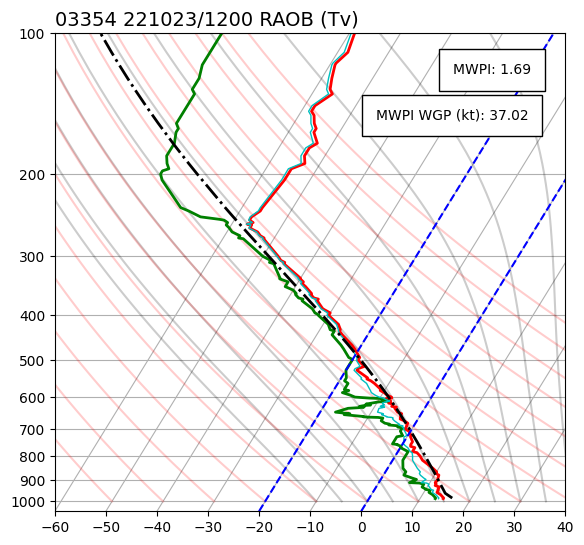

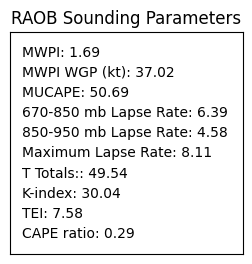

In [10]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('03354 221023/1200 RAOB (Tv)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.tmpc, prof.pres, 'r', lw=2)
ax.semilogy(prof.dwpc, prof.pres, 'g', lw=2)
ax.semilogy(prof.wetbulb, prof.pres, 'c-', lw=1)

# Plot the parcel trace.
ax.semilogy(pcl.ttrace, pcl.ptrace, 'k-.', lw=2)

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-60,40)
xticks = np.arange(-60, 41, 10)
ax.set_xticks(xticks)

ax.text(-20, 120, r'MWPI: '+mwp_str, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
ax.text(-15, 150, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
# Show the plot to the user.
plt.savefig('raob_03354_1023_1200_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
ax.set_title('RAOB Sounding Parameters')
#ax.set_xlabel('xlabel')
#ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 11])
ax.text(0.5, 10, r'MWPI: '+mwp_str, size=10, ha='left', va='center')
ax.text(0.5, 9, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='left', va='center')
ax.text(0.5, 8, r'MUCAPE: '+mucape, size=10, ha='left', va='center')
ax.text(0.5, 7, r'670-850 mb Lapse Rate: '+lr_hi, size=10, ha='left', va='center')
ax.text(0.5, 6, r'850-950 mb Lapse Rate: '+lr_lo, size=10, ha='left', va='center')
ax.text(0.5, 5, r'Maximum Lapse Rate: '+lr_max, size=10, ha='left', va='center')
ax.text(0.5, 4, r'T Totals:: '+t_tot, size=10, ha='left', va='center')
ax.text(0.5, 3, r'K-index: '+k_idx, size=10, ha='left', va='center')
ax.text(0.5, 2, r'TEI: '+te_idx, size=10, ha='left', va='center')
ax.text(0.5, 1, r'CAPE ratio: '+caperat, size=10, ha='left', va='center')
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('raob_03354_1023_1200_param_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

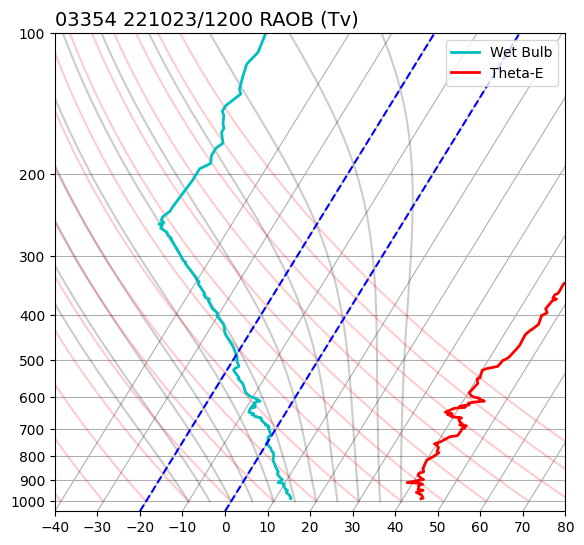

In [8]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('03354 221023/1200 RAOB (Tv)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.wetbulb, prof.pres, 'c', lw=2, label='Wet Bulb')
ax.semilogy(thermo.ktoc(prof.thetae), prof.pres, 'r', lw=2, label='Theta-E')

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-40,80)
xticks = np.arange(-40, 81, 10)
ax.set_xticks(xticks)

# Show the plot to the user.
plt.legend()
plt.savefig('raob_03354_1023_1200_wbte_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()